In [6]:
import numpy as np
import matplotlib.pyplot as plt


We try a cubic ansatz for the twist function:
$$ \psi(r) = ar^3 + br^2 + cr + d,$$
for $r\in[0,1]$.

There are three twist angle measurements that we have data for: the surface twist $\psi(R)$, the volume-averaged twist $\langle \psi\rangle$, and the mean-squared twist $\langle \psi^2\rangle$. For the Bell data these are roughly given by $\psi(R)=0.3$, $\langle\psi\rangle=0.28$, and $\langle\psi^2\rangle=0.01$. The functions below compute the three measurements for the cubic twist function.

In [71]:
def psi(r,a,b,c,d):
    return a*r**3 + b*r**2 + c*r + d

In [12]:
# Surface Twist:

def SurfaceTwist(a,b,c,d):
    return a+b+c+d

In [13]:
# Volume-Averaged Twist:

def MeanTwist(a,b,c,d):
    return (2/5)*a + (1/2)*b + (2/3)*c + d

In [14]:
# Mean-Squared Twist:

def MeanSquaredTwist(a,b,c,d):
    return (1/4)*a**2 + (4/7)*a*b + (2/3)*a*c + (4/5)*a*d + (1/3)*b**2 + (4/5)*b*c + b*d + (1/2)*c**2 + (4/3)*c*d + d**2

In [68]:
def a_sol(psi_R,b,c,d):
    return psi_R - b - c - d

def b_sol(psi_R,mean_psi,c,d):
    return -(2/3)*(4*c + 9*d - 15*mean_psi + 6*psi_R)

def c_sol_1(psi_R,mean_psi,mean_psi_squared,d):
    return (-63*d+30*(mean_psi)+33*(psi_R)-3*np.sqrt(6)*np.sqrt(-9*d**2+770*mean_psi_squared-900*(mean_psi)**2-11*(psi_R)*(2*d+9*(psi_R))+20*(mean_psi)*(2*d+11*(psi_R)))) /11
            
def c_sol_2(psi_R,mean_psi,mean_psi_squared,d):
    return (-63*d+30*(mean_psi)+33*(psi_R)+3*np.sqrt(6)*np.sqrt(-9*d**2+770*mean_psi_squared-900*(mean_psi)**2-11*(psi_R)*(2*d+9*(psi_R))+20*(mean_psi)*(2*d+11*(psi_R))))/11

def c_sol_3(psi_R,mean_psi,mean_psi_squared,d):
    return (-63*d+30*(mean_psi)+33*(psi_R))/11


            

In [95]:
# Bell Data:

psi_R = 0.3
mean_psi=0.28
mean_psi_squared = 0.01

In [96]:
d = 0

c = c_sol_3(psi_R,mean_psi,mean_psi_squared,d)

b = b_sol(psi_R,mean_psi,c,d)

a = a_sol(psi_R,b,c,d)

print(c)

1.6636363636363638


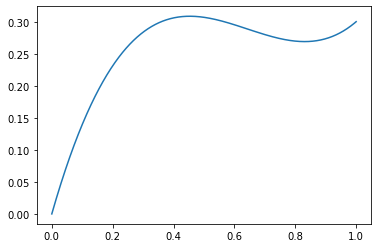

In [97]:
r_array = np.linspace(0,1,num=1000)

plt.plot(r_array,psi(r_array,a,b,c,d))
plt.show()

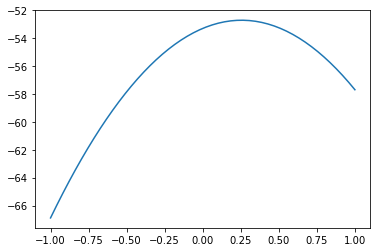

In [67]:
d_list = np.linspace(-1,1)

def thingy(psi_R,mean_psi,mean_psi_squared,d):
    return -9*d**2 + 770*mean_psi_squared - 900*(mean_psi)**2 - 11*(psi_R)*(2*d+9*(psi_R)) + 20*(mean_psi)*(2*d+11*(psi_R))

plt.plot(d_list,thingy(psi_R,mean_psi,mean_psi_squared,d_list))
plt.show()